In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [163]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [164]:
train_data=pd.read_csv("train.csv", encoding="latin1")
y = train_data.pop("SalePrice") #La variable respuesta
X = train_data.pop("OverallQual") 

xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [165]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
qual = xTrain.values.reshape(-1,1)
qual_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(qual, price)
price_pred = lm.predict(qual_t)

### Ecuación

In [166]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*qual % + 0.4f '%(m,c)
print(label)

price_pred = 44403.2127*qual -90600.5056 


Text(0.5, 1.0, 'Test set quality vs sale price')

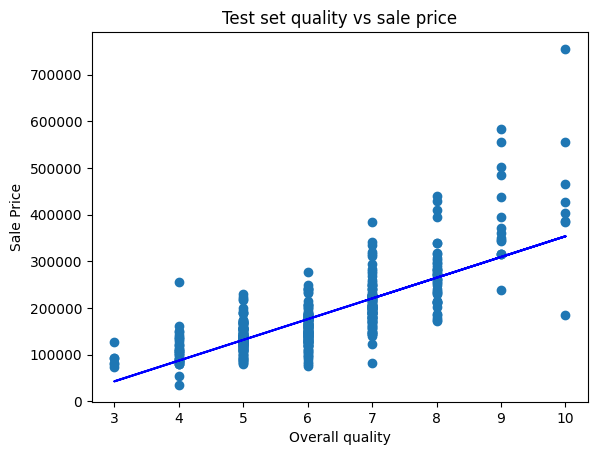

In [167]:
fig = plt.figure()
plt.scatter(qual_t, price_t) # Valor teórico (test)
plt.plot(qual_t, price_pred, color="blue") # valor predicho
plt.xlabel("Overall quality")
plt.ylabel("Sale Price")
plt.title("Test set quality vs sale price")

In [168]:
print("R^2: %.2f"%r2_score(price_t,price_pred))
print("MSE: %.2f"%mean_squared_error(price_t,price_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(price_t, price_pred)))

R^2: 0.60
MSE: 2961986082.15
RMSE: 54424.13


### Residuales

In [169]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[248328] [220221.98355459]  -->  		DIFF: [28106.01644541]
[501837] [309028.40903299]  -->  		DIFF: [192808.59096701]
[165000] [175818.77081539]  -->  		DIFF: [-10818.77081539]
[167500] [131415.55807619]  -->  		DIFF: [36084.44192381]
[153900] [175818.77081539]  -->  		DIFF: [-21918.77081539]
[112000] [87012.34533699]  -->  		DIFF: [24987.65466301]
[103200] [87012.34533699]  -->  		DIFF: [16187.65466301]
[212000] [264625.19629379]  -->  		DIFF: [-52625.19629379]
[271000] [264625.19629379]  -->  		DIFF: [6374.80370621]
[124000] [175818.77081539]  -->  		DIFF: [-51818.77081539]
[94500] [175818.77081539]  -->  		DIFF: [-81318.77081539]
[342643] [309028.40903299]  -->  		DIFF: [33614.59096701]
[107500] [131415.55807619]  -->  		DIFF: [-23915.55807619]
[128500] [131415.55807619]  -->  		DIFF: [-2915.55807619]
[147000] [175818.77081539]  -->  		DIFF: [-28818.77081539]
[87000] [87012.34533699]  -->  		DIFF: [-12.34533699]
[123000] [87012.34533699]  -->  		DIFF: [35987.65466301]
[156000] [13141

In [170]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 385
Valor real: [755000]
Valor predicho: [353431.62177219]
Diferencia máxima: [401568.37822781]


Text(0, 0.5, 'Residuales')

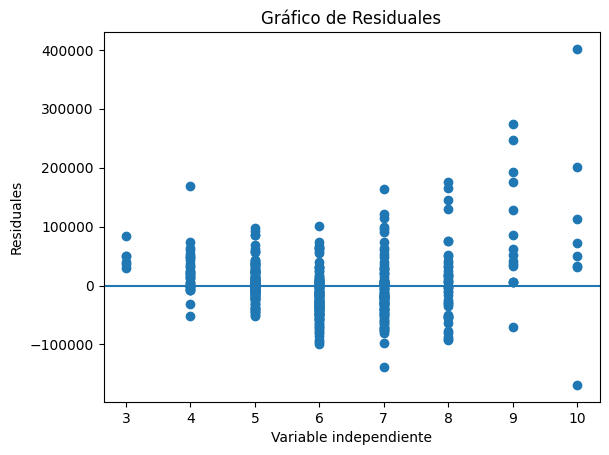

In [171]:
plt.plot(qual_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

## Modelo multivariable

Separación de variables numéricas

In [172]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Quitar algunas columnas con impacto reducido
columnas_cuantitativas.remove("Id")
columnas_cuantitativas.remove("MSSubClass")
columnas_cuantitativas.remove("FullBath")
columnas_cuantitativas.remove("HalfBath")
columnas_cuantitativas.remove("BedroomAbvGr")
columnas_cuantitativas.remove("KitchenAbvGr")
columnas_cuantitativas.remove("TotRmsAbvGrd")
columnas_cuantitativas.remove("Fireplaces")
columnas_cuantitativas.remove("LotFrontage")
columnas_cuantitativas.remove("MasVnrArea")
columnas_cuantitativas.remove("GarageYrBlt")

_train = train_data[columnas_cuantitativas]

# Eliminar columnas que contienen NaN
_train = _train.dropna(axis=1)

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

y = _train.pop("SalePrice")
X = _train

Columnas usadas (27) :
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [173]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scaler = StandardScaler()  # Crear el escalador

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1021, 26)
(438, 26)
(1021,)
(438,)


In [174]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo1 = LinearRegression()
modelo1.fit(X_train_scaled, price)
y_pred_modelo1 = modelo1.predict(X_test_scaled)


### Ecuación

In [175]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 179809.3497 + (6460.1782 * LotArea) + (26336.5804 * OverallQual) + (4819.5414 * OverallCond) + (9874.2985 * YearBuilt) + (4862.6734 * YearRemodAdd) + (3305.8179 * BsmtFinSF1) + (-254.1984 * BsmtFinSF2) + (-291.4131 * BsmtUnfSF) + (3092.7612 * TotalBsmtSF) + (10333.7339 * 1stFlrSF) + (6910.7047 * 2ndFlrSF) + (1020.9985 * LowQualFinSF) + (13350.0776 * GrLivArea) + (4711.5834 * BsmtFullBath) + (-1314.3323 * BsmtHalfBath) + (8810.6422 * GarageCars) + (1553.2715 * GarageArea) + (4842.2461 * WoodDeckSF) + (572.0181 * OpenPorchSF) + (1172.5548 * EnclosedPorch) + (966.8088 * 3SsnPorch) + (4608.7061 * ScreenPorch) + (-5603.3433 * PoolArea) + (-205.1384 * MiscVal) + (487.3375 * MoSold) + (-2146.2977 * YrSold)


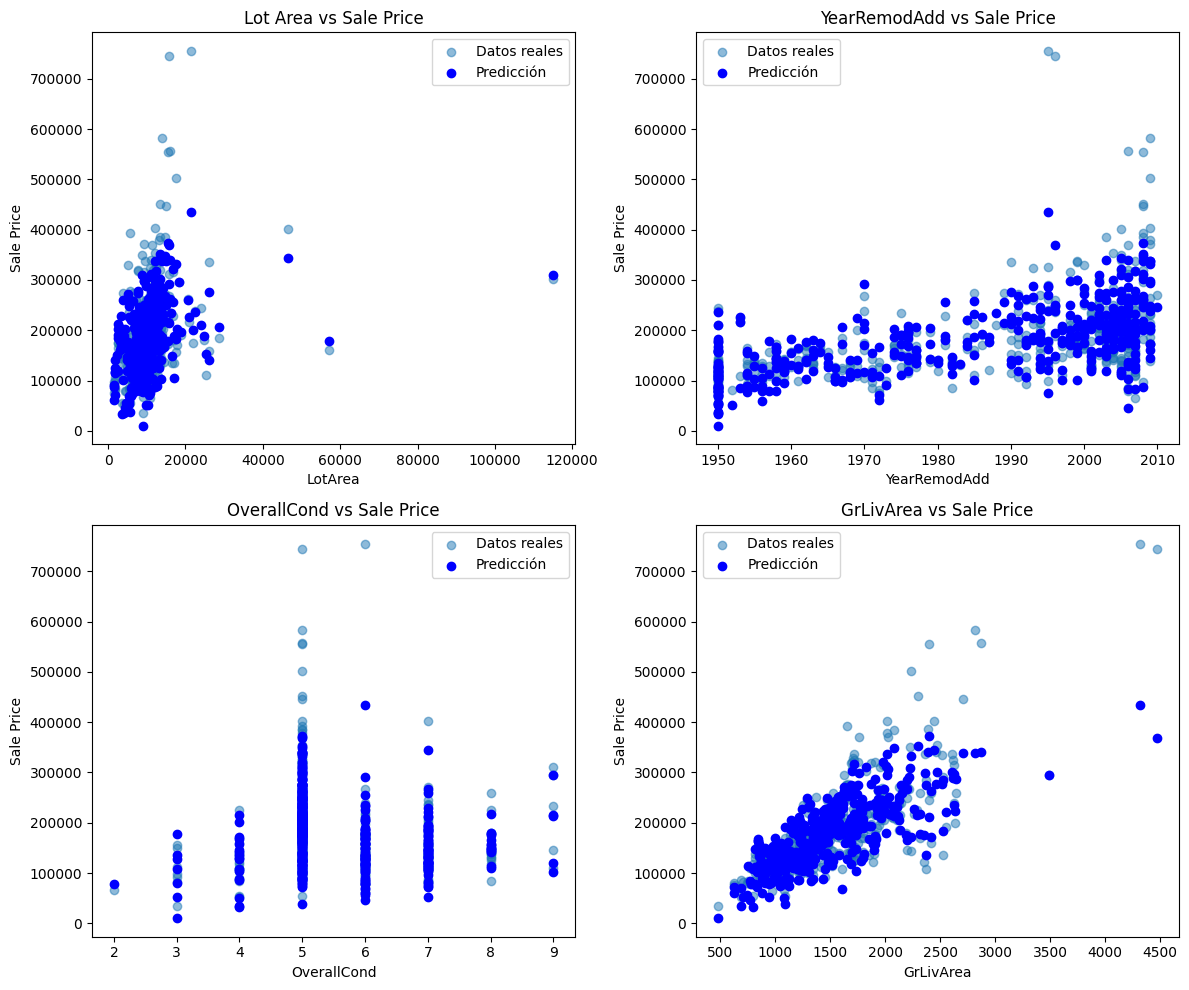

In [176]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo1, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [177]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(y_test, y_pred_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))

R^2:  0.7893
MSE:  1561384071.062
RMSE:  39514.3527


### Análisis de residuos

In [178]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[210000] [160242.21280622]  -->  		DIFF: [49757.78719378]
[115000] [103059.92070653]  -->  		DIFF: [11940.07929347]
[200000] [224348.87611181]  -->  		DIFF: [-24348.87611181]
[160000] [185777.92772055]  -->  		DIFF: [-25777.92772055]
[131500] [127127.81436433]  -->  		DIFF: [4372.18563567]
[147000] [150003.23460977]  -->  		DIFF: [-3003.23460977]
[179900] [189643.49601056]  -->  		DIFF: [-9743.49601056]
[271900] [268055.82410424]  -->  		DIFF: [3844.17589576]
[239000] [235497.74910349]  -->  		DIFF: [3502.25089651]
[122000] [156929.38534006]  -->  		DIFF: [-34929.38534006]
[91000] [50598.51812905]  -->  		DIFF: [40401.48187095]
[219210] [234331.69194696]  -->  		DIFF: [-15121.69194696]
[181134] [202616.5098242]  -->  		DIFF: [-21482.5098242]
[194700] [186498.01430521]  -->  		DIFF: [8201.98569479]
[260000] [234719.70895497]  -->  		DIFF: [25280.29104503]
[350000] [309375.78095606]  -->  		DIFF: [40624.21904394]
[162000] [183581.26235648]  -->  		DIFF: [-21581.26235648]
[318061] [277446

In [179]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 211
Valor real: [745000]
Valor predicho: [369275.41196564]
Diferencia máxima: [375724.58803436]


Text(0, 0.5, 'Residuales')

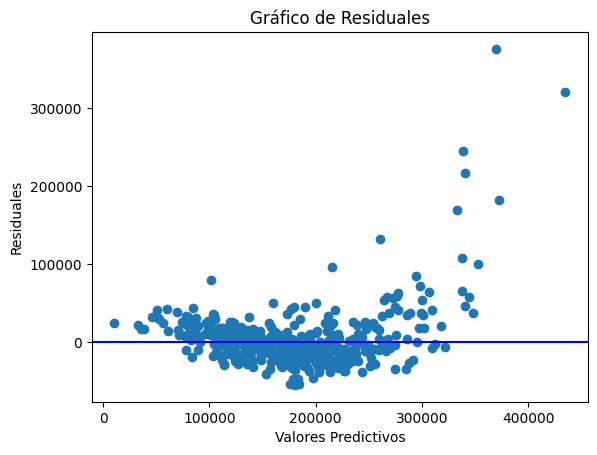

In [180]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

## Nuevo modelo

Separación de variables a usar

In [181]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath", "SalePrice"]

_train = train_data[columnas_aUsar]

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

# Aplicar logaritmo natural a SalePrice en el conjunto de entrenamiento
y = _train.pop("SalePrice")
X = _train

Columnas usadas (10) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath',
       'SalePrice'],
      dtype='object')


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scaler = StandardScaler()  # Crear el escalador

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [183]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo2 = LinearRegression()
modelo2.fit(X_train_scaled, price)
y_pred_modelo2 = modelo2.predict(X_test_scaled)


### Ecuación

In [184]:
# Obtener coeficientes e intercepto
intercept = modelo2.intercept_[0]  # Intercepto
coefs = modelo2.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 182960.5103 + (28101.5411 * OverallQual) + (5942.4184 * OverallCond) + (9542.2806 * YearBuilt) + (8210.9892 * BsmtFullBath) + (8273.4327 * TotalBsmtSF) + (29427.4648 * GrLivArea) + (12166.3085 * GarageCars) + (4805.2294 * WoodDeckSF) + (-754.8198 * FullBath)


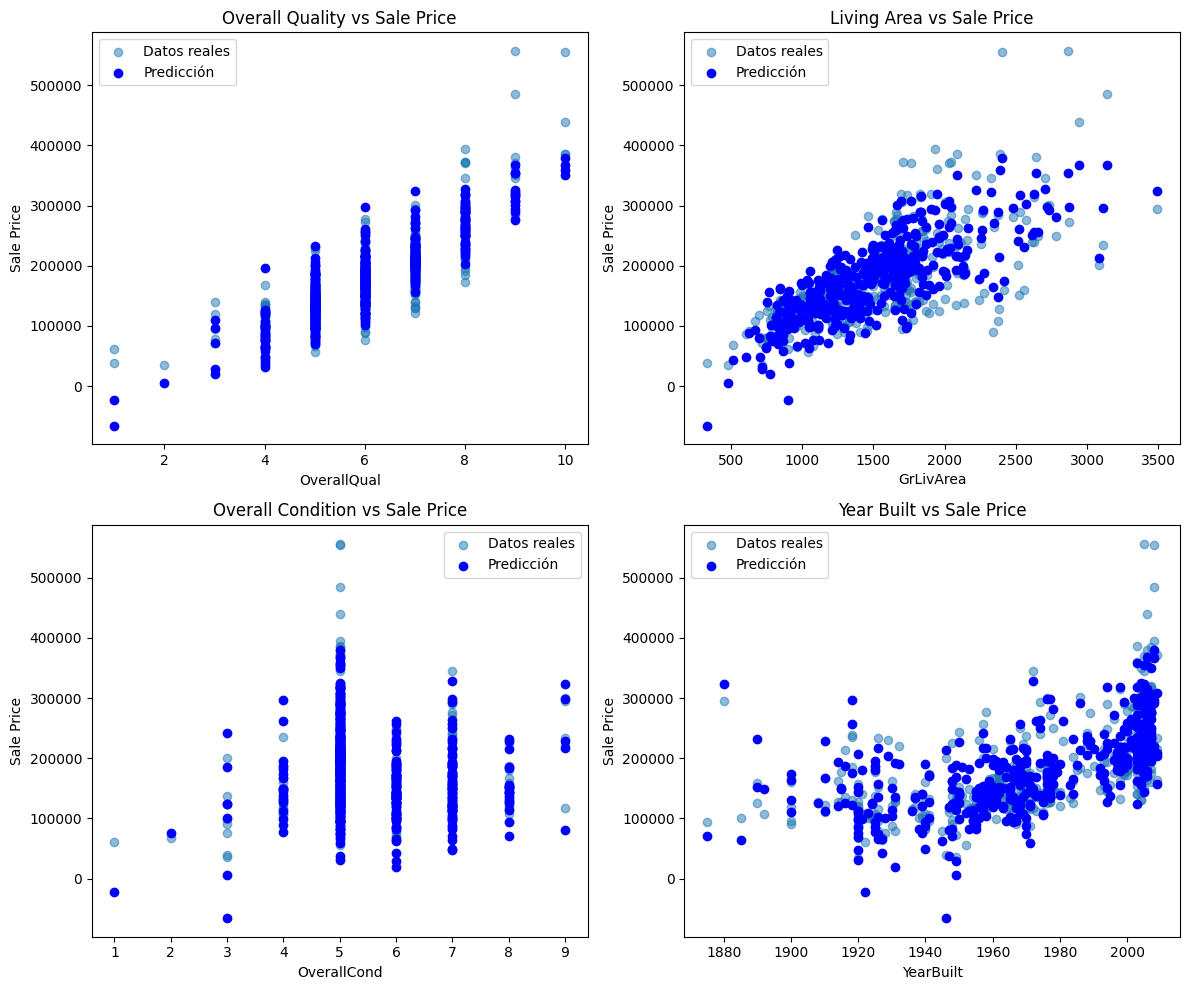

In [185]:
# Variables a graficar
variables = ["OverallQual", "GrLivArea", "OverallCond", "YearBuilt"]
titles = ["Overall Quality vs Sale Price", "Living Area vs Sale Price", 
          "Overall Condition vs Sale Price", "Year Built vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo2, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [186]:
# Regression metrics
mse_modelo2=mean_squared_error(price_t, y_pred_modelo2) 
r2_modelo2=r2_score(y_test, y_pred_modelo2)

print('R^2: ', round(r2_modelo2,4))
print('MSE: ', round(mse_modelo2,4))
print('RMSE: ', round(np.sqrt(mse_modelo2),4))

R^2:  0.8174
MSE:  961293386.7782
RMSE:  31004.7317


### Análisis de residuos

In [187]:
resid_modelo2=price_t-y_pred_modelo2
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo2[i], " --> ", "\t\tDIFF:",resid_modelo2[i])

[104900] [124396.94771069]  -->  		DIFF: [-19496.94771069]
[169990] [177677.98542748]  -->  		DIFF: [-7687.98542748]
[283463] [279287.3649722]  -->  		DIFF: [4175.6350278]
[115000] [58557.33541204]  -->  		DIFF: [56442.66458796]
[145250] [149592.52880028]  -->  		DIFF: [-4342.52880028]
[128000] [152314.18141974]  -->  		DIFF: [-24314.18141974]
[137900] [185880.43462245]  -->  		DIFF: [-47980.43462245]
[175000] [143052.74819468]  -->  		DIFF: [31947.25180532]
[140000] [194082.70366244]  -->  		DIFF: [-54082.70366244]
[161500] [164239.68061479]  -->  		DIFF: [-2739.68061479]
[164700] [178111.25847291]  -->  		DIFF: [-13411.25847291]
[162500] [166325.79729697]  -->  		DIFF: [-3825.79729697]
[248000] [225212.01651573]  -->  		DIFF: [22787.98348427]
[147000] [144352.79056002]  -->  		DIFF: [2647.20943998]
[181000] [179957.95014172]  -->  		DIFF: [1042.04985828]
[135000] [119496.070627]  -->  		DIFF: [15503.929373]
[135000] [126336.00389281]  -->  		DIFF: [8663.99610719]
[179900] [152221.771

In [188]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo2)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo2[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 300
Valor real: [556581]
Valor predicho: [354809.89521688]
Diferencia máxima: [201771.10478312]


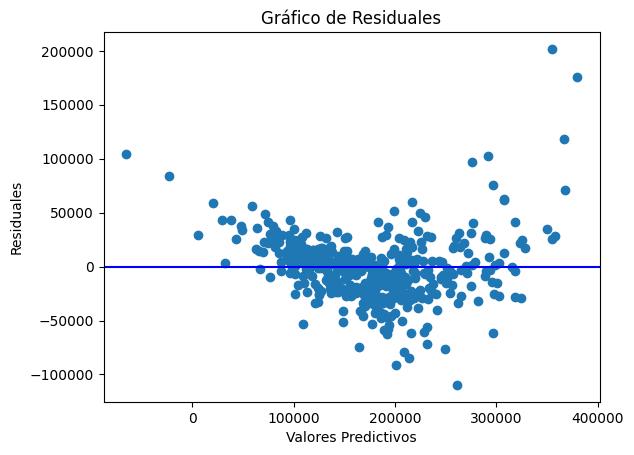

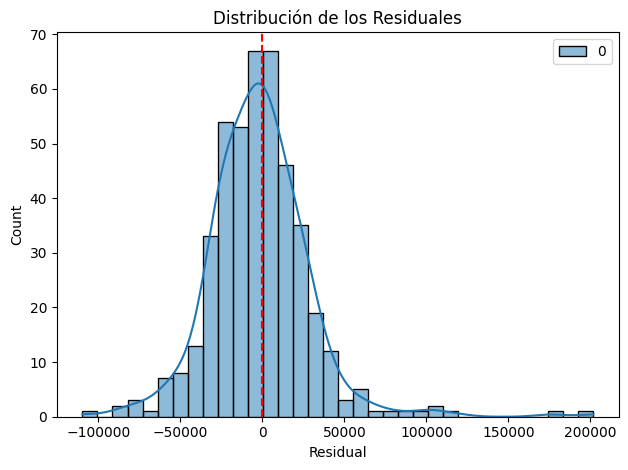

In [189]:
plt.scatter(y_pred_modelo2,resid_modelo2)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

# Distribución de los residuales
plt.figure()
sns.histplot(resid_modelo2, kde=True)
plt.title('Distribución de los Residuales')
plt.xlabel('Residual')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()